<a href="https://colab.research.google.com/github/WankhedeAmey/ML/blob/main/Fisher_Discriminant_Analysis_on_Crabs_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
from google.colab import files
import io

from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
uploaded = files.upload()

Saving crabs.csv to crabs.csv


# Load the data and process it

In [5]:
crabs_data = pd.read_csv("crabs.csv")
# Rename the columns
crabs_data = crabs_data.rename(columns={'sp':'species','FL':'Frontal Lobe','RW':'Rear Width','CL':'Carapace Midline',
                                        'CW':'Maximum Width','BD':'Body Depth'})

crabs_data['species'] = crabs_data['species'].map({'B':'Blue','O':'Orange'})
crabs_data['sex'] = crabs_data['sex'].map({'M':'Male','F':'Female'})

#The goal is to separate the 200 crabs into four classes, given by the 2x2 configurations for sex (male/female) and species (blue/orange).
crabs_data['class'] = crabs_data.species + crabs_data.sex

rel_feat = ['Frontal Lobe','Rear Width','Carapace Midline','Maximum Width','Body Depth']

crabs_data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,200.0,25.5000,14.467083,1.0,13.000,25.50,38.000,50.0
Frontal Lobe,200.0,15.5830,3.495325,7.2,12.900,15.55,18.050,23.1
Rear Width,200.0,12.7385,2.573340,6.5,11.000,12.80,14.300,20.2
Carapace Midline,200.0,32.1055,7.118983,14.7,27.275,32.10,37.225,47.6
Maximum Width,200.0,36.4145,7.871955,17.1,31.500,36.80,42.000,54.6
Body Depth,200.0,14.0305,3.424772,6.1,11.400,13.90,16.600,21.6


## Standardize the data
make mean = 0 and sd = 1

In [10]:
crabs_std = crabs_data.copy()

crabs_std[rel_feat] = StandardScaler().fit_transform(crabs_data[rel_feat])

crabs_std.describe().T

,count,mean,std,min,25%,50%,75%,max
index,200.0,2.550000e+01,14.467083,1.000000,13.000000,25.500000,38.000000,50.000000
Frontal Lobe,200.0,-7.105427e-17,1.002509,-2.404365,-0.769523,-0.009465,0.707571,2.155984
Rear Width,200.0,6.039613e-16,1.002509,-2.430365,-0.677276,0.023959,0.608322,2.906815
Carapace Midline,200.0,1.065814e-16,1.002509,-2.451077,-0.680241,-0.000775,0.720938,2.181966
Maximum Width,200.0,-4.973799e-16,1.002509,-2.459741,-0.625872,0.049094,0.711325,2.315960
Body Depth,200.0,0.000000e+00,1.002509,-2.321439,-0.770008,-0.038200,0.752152,2.215766


## Apply FDA

In [12]:
# 2D Model

#init a model
lda_2d = LinearDiscriminantAnalysis(n_components=2)

#apply model on the dataset
crabs_lda_2d = lda_2d.fit_transform(crabs_std[rel_feat], y=crabs_std['class']) #supervised model, thus target = 'class' required

crabs_std[['lda1', 'lda2']] = crabs_lda_2d
crabs_std.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,lda1,lda2
0,Blue,Male,1,-2.146232,-2.352450,-2.253926,-2.217772,-2.057989,BlueMale,1.538869,-0.808137
1,Blue,Male,2,-1.945462,-1.962875,-1.972282,-1.988538,-1.940899,BlueMale,1.637047,-0.370588
2,Blue,Male,3,-1.830736,-1.923917,-1.845543,-1.784775,-1.853083,BlueMale,2.802492,-0.249383
3,Blue,Male,4,-1.716010,-1.884960,-1.690638,-1.695629,-1.706721,BlueMale,2.295358,-1.029487
4,Blue,Male,5,-1.658647,-1.846002,-1.662474,-1.708364,-1.706721,BlueMale,1.732949,-1.119930


<Axes: xlabel='lda1', ylabel='lda2'>

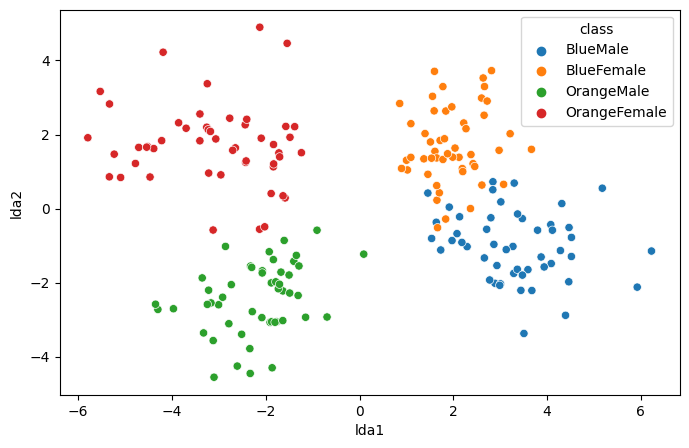

In [14]:
# 2D plot
fig=plt.figure(figsize=(8, 5))

sns.scatterplot(x='lda1', y='lda2', hue='class', data=crabs_std)

In [16]:
#3D Model
#init a model
lda_3d = LinearDiscriminantAnalysis(n_components=3)

#apply model on the dataset
crabs_lda_3d = lda_3d.fit_transform(crabs_std[rel_feat], y=crabs_std['class']) #supervised model, thus target = 'class' required

crabs_std[['lda1', 'lda2', 'lda3']] = crabs_lda_3d
crabs_std.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,lda1,lda2,lda3
0,Blue,Male,1,-2.146232,-2.352450,-2.253926,-2.217772,-2.057989,BlueMale,1.538869,-0.808137,1.186420
1,Blue,Male,2,-1.945462,-1.962875,-1.972282,-1.988538,-1.940899,BlueMale,1.637047,-0.370588,1.172750
2,Blue,Male,3,-1.830736,-1.923917,-1.845543,-1.784775,-1.853083,BlueMale,2.802492,-0.249383,0.502351
3,Blue,Male,4,-1.716010,-1.884960,-1.690638,-1.695629,-1.706721,BlueMale,2.295358,-1.029487,0.814667
4,Blue,Male,5,-1.658647,-1.846002,-1.662474,-1.708364,-1.706721,BlueMale,1.732949,-1.119930,0.728544


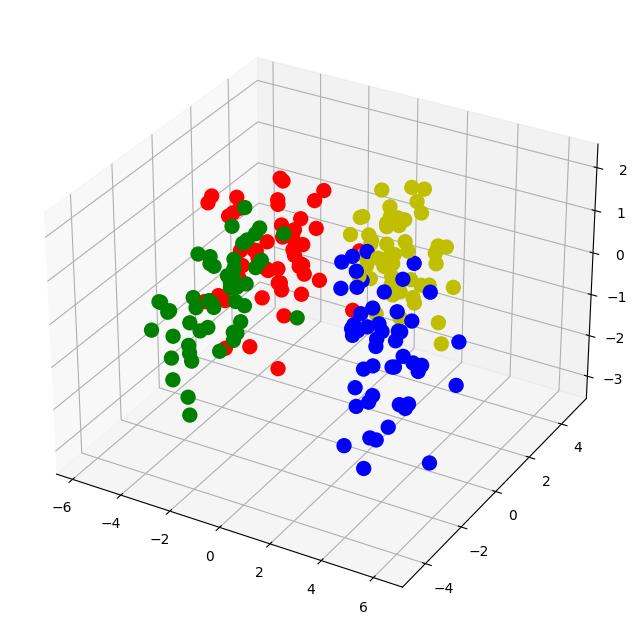

In [18]:
#3D plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

colors_crabs = {'BlueFemale': 'y','BlueMale': 'b','OrangeFemale':'r','OrangeMale':'g'}

plt.scatter(crabs_std.lda1,crabs_std.lda2,zs=crabs_std.lda3,
            depthshade=False,c=crabs_std['class'].apply(lambda x: colors_crabs[x]),s=100)

In [17]:
# 3D plot
fig=px.scatter_3d(crabs_std, x='lda1', y='lda2', z='lda3', color='class')
fig.show()

Fisher Discriminant Analysis (FDA), also known as Linear Discriminant Analysis (LDA), is a supervised dimensionality reduction and classification technique used to find a linear combination of features that characterizes or separates classes in a dataset.

Key aspects of Fisher Discriminant Analysis:

1. **Objective**:
   - The primary goal of FDA is to reduce the dimensionality of the feature space while preserving the class-discriminatory information to best separate different classes.

2. **Supervised Learning**:
   - FDA is a supervised learning technique that requires labeled data, where the classes or categories of each data point are known.
   - It aims to find a projection that maximizes the separation between classes while minimizing the variation within each class.

3. **Linear Transformation**:
   - FDA performs a linear transformation on the original feature space to find a new set of dimensions (discriminant axes) that maximize the separation between multiple classes.
   - It projects the data onto these discriminant axes to achieve better class separation.

4. **Maximizing Between-Class and Minimizing Within-Class Variance**:
   - FDA seeks to maximize the ratio of between-class scatter to within-class scatter.
   - Between-class scatter refers to the spread or variance between different classes, while within-class scatter refers to the spread within each class.

5. **Steps**:
   - Compute the mean vectors for each class and the overall mean of the entire dataset.
   - Compute the within-class scatter matrix and between-class scatter matrix.
   - Find the eigenvectors and eigenvalues of a matrix derived from the scatter matrices.
   - Select the top k eigenvectors corresponding to the largest eigenvalues to form the transformation matrix.

6. **Applications**:
   - FDA is commonly used in pattern recognition, classification tasks, and feature extraction, especially when dealing with multi-class classification problems.
   - It's employed in various fields like image recognition, biometrics, and signal processing.

In summary, Fisher Discriminant Analysis is a supervised dimensionality reduction technique that seeks a projection of features to maximize class separability while reducing dimensionality. It's particularly useful when the goal is to find features that best discriminate between different classes in labeled datasets.